<a href="https://colab.research.google.com/github/setyo-dwi-pratama/Courses/blob/main/17_Data_Science_Project_Analisis_Data_COVID19_di_Dunia_%26_ASEAN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Project: Analisis Data COVID19 di Dunia & ASEAN**

### **Pendahuluan**

### **Pendahuluan**
Covid19 adalah pandemi yang sudah mewabah ke seluruh dunia. Sebagian besar negara-negara di dunia sudah terjangkit. Penanganan tiap-tiap negara pun berbeda, sesuai dengan kebijakan pemerintah. Hal ini mengakibatkan perbedaan trend kenaikan atau penurunan kasus covid berbeda-beda tiap negara.

Pada kasus kali ini, kita akan mencoba menggali data covid19 dari salah satu open api yang tersedia yaitu https://covid19-api.org/.

### **Library yang dibutuhkan**
Pertama-tama, import terlebih dahulu library yang dibutuhkan, antara lain secara berurutan adalah

**json**,

**numpy**,

**pandas**, dan

**requests**.

Library numpy dan pandas diimport sebagai aliasnya.

In [1]:
import json
import numpy as np
import pandas as pd
import requests

## **Mengakses Data Covid-19 Dari https://covid19-api.org**

### **Membuat Fungsi get API**
Buat fungsi python **get_json** dengan parameter **api_url**. fungsi ini akan mengembalikan value berupa python dictionary jika **status_code** yang dihasilkan adalah 200. Jika tidak, maka value yang dikembalikan adalah **None**.

In [3]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

### **Memanggil API Covid19**
Rekapitulasi data COVID-19 global berada di https://covid19-api.org/. Gunakan parameter **record_date** untuk mengambil data covid19 di seluruh negara pada tanggal tertentu. Untuk kasus ini, gunakan record_date **'2020-08-17'**, dan masukkan hasil respon api ke variable **df_covid_worldwide**.

Untuk mendapatkan dataframe covid19, gunakan fungsi **pd.io.json**.**json_normalize** dan panggil function yang sudah dibuat sebelumnya, yaitu **get_json()** Print sample data covid dengan menggunakan **head()** function.

In [12]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

df_covid_worldwide

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,country,last_update,cases,deaths,recovered
0,US,2020-08-16T23:27:50,5401167,170019,1833067
1,BR,2020-08-16T23:27:50,3340197,107852,2655017
2,IN,2020-08-16T23:27:50,2589682,49980,1862258
3,RU,2020-08-16T23:27:50,920719,15653,731444
4,ZA,2020-08-16T23:27:50,587345,11839,472377
...,...,...,...,...,...
201,GG,2020-03-17T18:33:03,0,0,0
202,GL,2020-03-19T09:33:04,0,0,0
203,GU,2020-03-18T19:14:33,0,0,0
204,JE,2020-03-17T18:33:03,0,0,0


In [13]:
df_covid_worldwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      206 non-null    object
 1   last_update  206 non-null    object
 2   cases        206 non-null    int64 
 3   deaths       206 non-null    int64 
 4   recovered    206 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 8.2+ KB


### **Merubah Format date**
Ubah format kolom 'last_update' menggunakan fungsi to_datetime dengan format **YYYY-mm-dd HH:MM:SS**. Lalu ubah bentuk datetime ke bentuk date dengan fungsi date() melalui fungsi lambda untuk mengubah setiap row-nya.

In [14]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

### **Mengambil Data Countries**
Buatlah dataframe countries dengan memanggil variable **countries_url** ke api covid19-api.org. Lalu ubah nama kolom alpha2 menjadi country, kemudian ambil hanya kolom name dan country saja untuk dataframe countries (**df_countries**) ini.

Akhirnya cetaklah lima data teratas dari **dataframe countries** (df_countries).

In [16]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})
print(df_countries.head())

          name country alpha3 numeric  latitude  longitude
0  Afghanistan      AF    AFG     004      33.0       65.0
1      Albania      AL    ALB     008      41.0       20.0
2      Algeria      DZ    DZA     012      28.0        3.0
3      Andorra      AD    AND     020      42.5        1.5
4       Angola      AO    AGO     024     -12.5       18.5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [21]:
# Akses kolom name dan country
df_countries = df_countries[['name','country']]
df_countries

,name,country
0,Afghanistan,AF
1,Albania,AL
2,Algeria,DZ
3,Andorra,AD
4,Angola,AO
...,...,...
205,Viet Nam,VN
206,Western Sahara,EH
207,Yemen,YE
208,Zambia,ZM


## **Kasus Covid-19 di Dunia dan Negara Mana yang Tertinggi**

### **Merge Covid19 Data dan Countries**
Selanjutnya adalah mapping data covid19 dan data country. Gunakan fungsi merge pada pandas untuk menggabungkan df_covid_worldwide dan df_countries. Untuk merge, gunakan kolom country. Lalu print sample data dengan menggunakan head().

In [26]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-08-16  5401167  170019    1833067  United States of America
1      BR  2020-08-16  3340197  107852    2655017                    Brazil
2      IN  2020-08-16  2589682   49980    1862258                     India
3      RU  2020-08-16   920719   15653     731444        Russian Federation
4      ZA  2020-08-16   587345   11839     472377              South Africa


### **Menghitung Fatality Ratio**
Tambahkan satu kolom tambahan yaitu fatality_ratio, yang merupakan pembagian antara kolom deaths dan cases.

In [28]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']
df_covid_denormalized.head()

,country,last_update,cases,deaths,recovered,name,fatality_ratio
0,US,2020-08-16,5401167,170019,1833067,United States of America,0.031478
1,BR,2020-08-16,3340197,107852,2655017,Brazil,0.032289
2,IN,2020-08-16,2589682,49980,1862258,India,0.019300
3,RU,2020-08-16,920719,15653,731444,Russian Federation,0.017001
4,ZA,2020-08-16,587345,11839,472377,South Africa,0.020157


### **Negara-negara dengan Fatality Ratio Tertinggi**
Ambil top 20 negara dengan value kolom fatality_ratio tertinggi dengan menggunakan fungsi sort_values.

In [35]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

### **Import Library Visualisasi**
Importlah library matplotlib.pyplot sebagai aliasnya plt.

In [36]:
import matplotlib.pyplot as plt

### **Visualisasi Negara dengan Fatality Ratio Tertinggi**
Untuk memvisualisasikan negara-negara dengan kasus fatality rate tertinggi akibat covid-19 ini dapat dilakukan dengan menggunakan bar chart.  Di sini tentukan terlebih dahulu isi dari variable x axis dan y axis.

Variabel x axis adalah kolom name, dan kolom y atau value nya adalah kolom **fatality_ratio** dan gunakan fungsi plt.bar([value x axis, value y axis]).

Label sumbu x diputar 90 derajat untuk menghindari bertumpuknya nama-nama negara pada posisi 0 derajat.

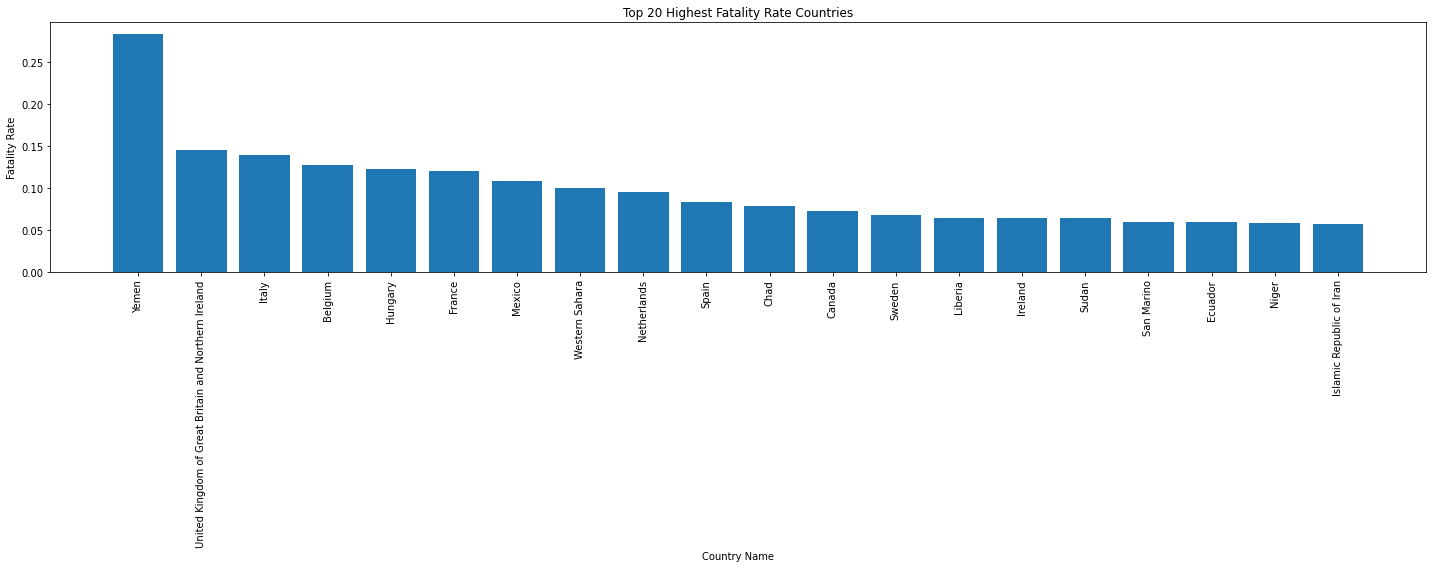

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Kasus Covid-19 di ASEAN**

### Menggabungkan Dataframe
Selanjutnya adalah membandingkan kasus covid19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:

* MY -> Malaysia,
* SG -> Singapure,
* TH -> Thailand,
* VN -> Vietnam.

Untuk itu, api country dipanggil berkali-kali sebanyak negara yang akan kita bandingkan.

Gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json().

Gunakan fungsi datetime untuk merubah string ke bentuk datetime (YYYY-mm-dd HH:MM:SS) yang selanjutnya diubah ke format date.

Cetaklah lima data teratas dari dataframe yang telah dibentuk.

In [42]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
  covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
  df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
  df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
  df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
  if i==0:
    df_covid_timeline_merged = df_covid_timeline
  else:
    df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
  i=i+1

df_covid_timeline_merged

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,country,last_update,cases,deaths,recovered
0,VN,2021-02-19,2347,35,1605
1,VN,2021-02-18,2347,35,1605
2,VN,2021-02-17,2329,35,1574
3,VN,2021-02-16,2311,35,1573
4,VN,2021-02-15,2269,35,1541
...,...,...,...,...,...
1848,ID,2020-03-10,27,0,2
1849,ID,2020-03-09,19,0,0
1850,ID,2020-03-08,6,0,0
1851,ID,2020-03-06,4,0,0


In [43]:
df_covid_timeline_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      1853 non-null   object
 1   last_update  1853 non-null   object
 2   cases        1853 non-null   int64 
 3   deaths       1853 non-null   int64 
 4   recovered    1853 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 72.5+ KB


### **Merge Data Covid19 Dengan Data Country**
Lalu gabungkan **df_covid_timeline_merged** dengan **df_countries** dengan kolom country sebagai **pivot**.

In [44]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')
df_covid_timeline_denormalized

,country,last_update,cases,deaths,recovered,name
0,VN,2021-02-19,2347,35,1605,Viet Nam
1,VN,2021-02-18,2347,35,1605,Viet Nam
2,VN,2021-02-17,2329,35,1574,Viet Nam
3,VN,2021-02-16,2311,35,1573,Viet Nam
4,VN,2021-02-15,2269,35,1541,Viet Nam
...,...,...,...,...,...,...
1848,ID,2020-03-10,27,0,2,Indonesia
1849,ID,2020-03-09,19,0,0,Indonesia
1850,ID,2020-03-08,6,0,0,Indonesia
1851,ID,2020-03-06,4,0,0,Indonesia


### **Kasus Covid-19 di ASEAN pada Bulan Maret 2020**
Filter kolom last_update dari data covid19 sehingga hanya data dari tanggal 1 Maret 2020 ke atas yangdiambil. Format datetime.date menggunakan format YYYY, mm, dd.

In [45]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

### **Visualisasi Kasus Covid-19 di ASEAN**
Buat variable x dan y dimana x adalah tanggal (last_update) pada tiap-tiap negara dan y adalah jumlah kasus (cases) pada tiap-tiap negara. Lalu plot x dan y untuk menggambar line chart.

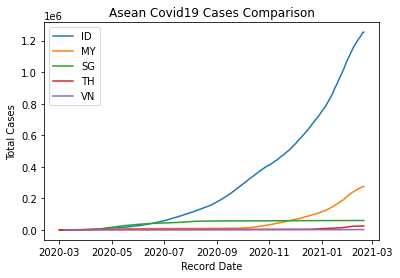

In [47]:
import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update']
	y = df_covid_timeline_denormalized[country_data]['cases']
	plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()

## **Penutup/Kesimpulan**
Selamat kamu telah menyelesaikan Project Visualisasi: Kasus Covid-19 di Dunia dan ASEAN.